# Cours 3 - visualiser les données

Souvent même avant de calculer des indicateurs, la visualisation permet d'avoir une idée du contenu des données.

La visualisation intervient aux différents moments de la réflexion :

1. **Avant**, pour se faire une idée
2. **Pendant**, pour affiner la réflexion
3. **A la fin**, pour présenter les résultats

Ce cours vise à utiliser les différentes visualisations avec Pandas pour facilement visualiser les données et comprendre la démarche.

L'idée générale est d'avoir des exemples faciles à réutiliser. C'est pour cette raison que nous allons le faire de manière "appliquée".

## Chargement des données

Ces étapes ne sont pas nécessaire à comprendre en détail et servent à charger les données

In [4]:
#importer la bibliothèque Pandas (Si elle n'existe pas, il est possible de l'installer avec la commande !pip install pandas)
import pandas as pd

#chargement des données du questionnaire
url = "https://raw.githubusercontent.com/emilienschultz/mathSHS/master/Donn%C3%A9es/questionnaire230920.csv"
donnees = pd.read_csv(url)

#sélection des colonnes utiles
donnees = donnees[donnees.columns[9:]] 
donnees.columns = ["age","internet","concerne_politique","concerne_epidemie",
                  "concerne_environnement","concerne_mathematiques","concerne_technologie",
                  "concerne_sucre","concerne_spatial","cinema","livres","confiance_justice",
                  "confiance_media","confiance_police","confiance_assemblee","confiance_administration",
                  "confiance_science","confiance_entreprises","confiance_associations","confiance_gouvernement",
                  "confiance_agences","interet_science","description_science"]

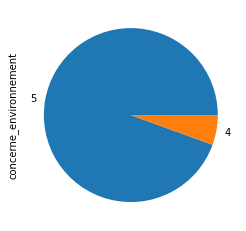

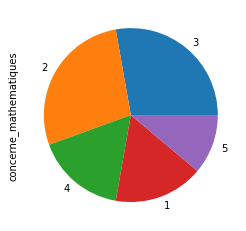

In [7]:
donnees["concerne_mathematiques"].value_counts().plot(kind="pie")

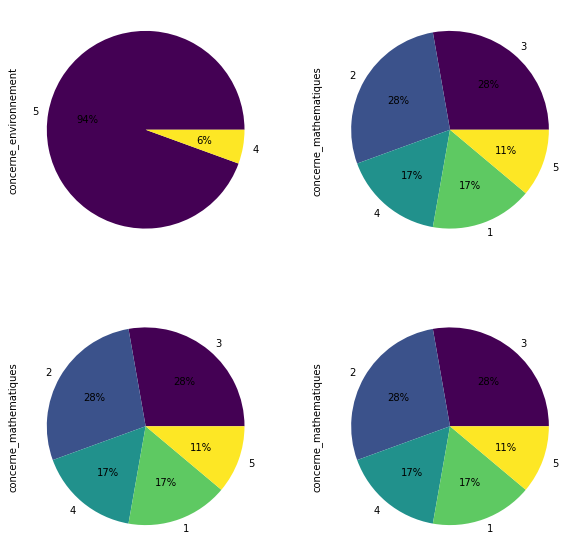

In [26]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(10,10))

donnees["concerne_environnement"].value_counts().plot(kind="pie",ax=axes[0][0],autopct='%1.0f%%',cmap="viridis")
donnees["concerne_mathematiques"].value_counts().plot(kind="pie",ax=axes[1][1],autopct='%1.0f%%',cmap="viridis")
donnees["concerne_mathematiques"].value_counts().plot(kind="pie",ax=axes[0][1],autopct='%1.0f%%',cmap="viridis")
donnees["concerne_mathematiques"].value_counts().plot(kind="pie",ax=axes[1][0],autopct='%1.0f%%',cmap="viridis")

plt.savefig("NOM.png")

In [10]:
len(ax)

2

In [3]:
import pandas as pd
pd.crosstab(donnees["confiance_science"],donnees["concerne_politique"])

#Création d'une fonction qui fait un tableau croisé
def tableau_croise(c1,c2):
    t_absolu = pd.crosstab(c1,c2,margins=True)
    t_pourcentage = pd.crosstab(c1,c2)\
            .apply(lambda x: 100*x/sum(x),axis=1)
    t = t_absolu.copy()
    for i in range(0,t_pourcentage.shape[0]):
        for j in range(0,t_pourcentage.shape[1]):
            t.iloc[i,j] = str(t_absolu.iloc[i,j]) \
            +" ("+str(round(t_pourcentage.iloc[i,j],1))+"%)"
    return t

tableau_croise(donnees["confiance_science"],donnees["concerne_politique"])

concerne_politique,2,3,4,5,All
confiance_science,,,,,
3,0 (0.0%),0 (0.0%),1 (100.0%),0 (0.0%),1
4,0 (0.0%),2 (25.0%),3 (37.5%),3 (37.5%),8
5,3 (33.3%),0 (0.0%),1 (11.1%),5 (55.6%),9
All,3,2,5,8,18


## Quelques éléments pour visualiser avec Python

La bibliothèque de base est Matplotlib. Pandas l'utilise pour faire des visualisations. On est alors amené à utiliser :

- Pandas pour faire la première visualisation
- Matplotlib pour finaliser et régler les détails

Tout peut être fait. Cependant, si une première visualisation est facile, l'affiner peut être (un peu) compliqué.

Le mieux est de procéder avec des exemples qu'il est ensuite facile de réutiliser.

**L'objectif est d'avoir des exemples que vous pouvez réutiliser**

## Chargement de la bibliothèque de visualisation

Ce sera la même chose à chaque fois

In [ ]:
#importer les modules pour la visualisation
import matplotlib.pyplot as plt
%matplotlib inline

## Les différentes visualisations

On part d'un tableau de données. On prend les données du sondage de la séance 2. On s'intéresse à une variable, par exemple l'âge.

In [ ]:
donnees["age"].value_counts()

### Diagramme en barres

Idée : représenter chaque modalité par une colonne de taille correspondante

In [ ]:
donnees["age"].value_counts().plot(kind="bar")

Et si on veut mettre dans l'ordre ? Utilisez la fonction .sort_index()

In [ ]:
donnees["age"].value_counts().sort_index()

Et avec la visualisation

In [ ]:
donnees["age"].value_counts().sort_index().plot(kind="bar")

Des barres horizontales ? Utilisez l'option "barh".

In [ ]:
donnees["age"].value_counts().sort_index().plot(kind="barh")

La même avec un titre ?

In [ ]:
donnees["age"].value_counts().sort_index().plot(kind="bar",title="Variable âge")

Et des noms d'axes, en utilisant Matplotlib

In [ ]:
donnees["age"].value_counts().sort_index().plot(kind="bar",title="Variable âge",color="orange")
plt.xlabel("Âge")
plt.ylabel("Effectif")

## Diagramme circulaire

In [ ]:
donnees["age"].value_counts().plot(kind="pie")

## Histogramme

La distribution d'une variable, ici le nombre de livre lus. L'option bins indique le nombre d'intervalles de découpage  (le nombre de colonnes)

In [ ]:
donnees["livres"].plot(kind="hist", bins=5)

Il y a bien 5 colonnes

Avec plein d'options : rwidth pour la largeur des colonnes (entre 0 et 1), figsize pour la taille de la figure et alpha pour la transparence

In [ ]:
donnees["livres"].plot(kind="hist", bins=5,  rwidth=0.9, figsize=(10,4), alpha=0.5)
plt.title("Distribution des livres lus")
plt.xlabel("Livres lus")
plt.ylabel("Effectif")
plt.grid(False) #enlever la grille

## Nuage de points

Il faut préciser les abscisses avec x et les ordonnées avec y

In [ ]:
donnees.plot(kind="scatter",x="livres",y="cinema",alpha = 0.5)
plt.title("Nuage de points")

Faire la même avec internet et les livres

In [ ]:
donnees.plot(kind="scatter",x="livres",y="internet",alpha = 0.5)
plt.title("Nuage de points")

Zoomer sur une partie : abscisses entre 2 et 12, et ordonnées entre 0 et 10

In [ ]:
donnees.plot(kind="scatter",x="livres",y="cinema",alpha = 0.5)
plt.title("Nuage de points")
plt.xlim(2,12)
plt.ylim(0,10)

## ------ fin de la séance 4, la suite peut être faite en plus ----

## Tracer une droite

Dès que l'on veut manipuler les données de manière plus directe, les fonctions des tableaux sont plus difficiles à utiliser. Pour cette raison, nous utilisons directement les outils de Matplotlib, que nous avons chargé, et qui s'obtiennent avec la commande "plt."

Un exemple est de tracer une droite avec la fonction plot qui prend comme arguments les abscisses, les ordonnées, et des paramètres

In [ ]:
X = range(0,20) #définir une liste de nombre
Y = [] #définir une liste vide

for x in X: #faire une boucle sur x
    y = 0.5*x+1 #calculer la valeur de la droite
    Y.append(y) #ajouter à la liste
    
plt.plot(X,Y,".-") #afficher

Exercice : Utiliser la même approche pour tracer une parabole

Utiliser Matplotlib pour tracer un diagramme en barre

In [ ]:
plt.bar([1,2,3,4,5],[1,2,3,4,5])
plt.title("Diagramme en barres")
plt.xlabel("Abscisse")
plt.ylabel("Ordonnées")

## Deux graphiques sur le même schéma

Il est possible de tracer plusieurs graphiques ensemble. La composition peut dans certains cas être un peu compliquées. Mais l'idée générale est :

- définir une nouvelle figure vide
- ajouter des graphiques

In [ ]:
donnees["confiance_police"].value_counts().sort_index()

In [ ]:
donnees["confiance_science"].value_counts().sort_index()

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(5,8))

ax[0].bar([1,2,3,4,5],[0,3,9,5,1])
ax[0].set_title("Confiance dans la police")
ax[0].set_ylabel("Nombre de réponses")


ax[1].bar([1,2,3,4,5],[0,0,1,8,9])
ax[1].set_title("Confiance dans la science")
ax[1].set_xlabel("Réponses")
ax[1].set_ylabel("Nombre de réponses")

Exercice : rajouter des variables

## Sauvegarder une figure

Il suffit de rajouter plt.savefig("NOM.png") à la fin ...

## En guise de conclusion

Créer des visualisations très finalisées peut prendre du temps. Ce n'est pas l'objectif de ce cours. L'objectif est d'avoir une idée de ce qui est possible, de savoir réaliser quelques visualisations de base et de pouvoir réfléchir à vos besoins pour le traitement en groupe.

## Visualiser une gaussienne

In [ ]:
import math
def gaussian(x, s, m):
          return 1./(s*math.sqrt(2*math.pi))*np.exp(-alpha*(x - m)**2/(2*s**2))
